<img src = "https://global-uploads.webflow.com/5f0d53c042a9ed6288de7f8d/5f6337ae2cfaa10946ceeb06_Hacktiv8%20logo%20horizontal%2001%20black-p-500.png" width = 400>
<h1 align=center><font size = 5>Hacktiv8 PTP Introduction to Data Science Projects 2 // Statistical Treatment for Datasets</font></h1>

Title: Hacktiv8 PTP Introduction to Data Science Projects 2: Statistical Treatment for Datasets Starter Notebook\
Last Updated: September 20, 2020\
Author: Raka Ardhi

## NYC Property Sales Introduction

The aim of this projects is to introduce you to practical statistic with Python as concrete and as consistent as possible. Using what you’ve learned; download the NYC Property Sales Dataset from Kaggle. This dataset is a record of every building or building unit (apartment, etc.) sold in the New York City property market over a 12-month period.

This dataset contains the location, address, type, sale price, and sale date of building units sold. A reference on the trickier fields:

* `BOROUGH`: A digit code for the borough the property is located in; in order these are Manhattan (1), Bronx (2), Brooklyn (3), Queens (4), and Staten Island (5).
* `BLOCK`; `LOT`: The combination of borough, block, and lot forms a unique key for property in New York City. Commonly called a BBL.
* `BUILDING CLASS AT PRESENT` and `BUILDING CLASS AT TIME OF SALE`: The type of building at various points in time.

Note that because this is a financial transaction dataset, there are some points that need to be kept in mind:

* Many sales occur with a nonsensically small dollar amount: $0 most commonly. These sales are actually transfers of deeds between parties: for example, parents transferring ownership to their home to a child after moving out for retirement.
* This dataset uses the financial definition of a building/building unit, for tax purposes. In case a single entity owns the building in question, a sale covers the value of the entire building. In case a building is owned piecemeal by its residents (a condominium), a sale refers to a single apartment (or group of apartments) owned by some individual.

Formulate a question and derive a statistical hypothesis test to answer the question. You have to demonstrate that you’re able to make decisions using data in a scientific manner. Examples of questions can be:

* Is there a difference in unit sold between property built in 1900-2000 and 2001 so on?
* Is there a difference in unit sold based on building category?
* What can you discover about New York City real estate by looking at a year's worth of raw transaction records? Can you spot trends in the market?

Please make sure that you have completed the lesson for this course, namely Python and Practical Statistics which is part of this Program.

**Note:** You can take a look at Project Rubric below:

| Code Review |  |
| :--- | :--- |
| CRITERIA | SPECIFICATIONS |
| Mean | Student implement mean to specifics column/data using pandas, numpy, or scipy|
| Median | Student implement median to specifics column/data using pandas, numpy, or scipy|
| Modus | Student implement modus to specifics column/data using pandas, numpy, or scipy|
| Central Tendencies | Implementing Central Tendencies through dataset |
| Box Plot | Implementing Box Plot to visualize spesific data |
| Z-Score | Implementing Z-score concept to specific data |
| Probability Distribution | Student analyzing distribution of data and gain insight from the distribution |
| Intervals | Implementing Confidence or Prediction Intervals |
| Hypotesis Testing | Made 1 Hypotesis and get conclusion from data |
| Preprocessing | Student preprocess dataset before applying the statistical treatment. |
| Does the code run without errors? | The code runs without errors. All code is functional and formatted properly. |

| Readability |  |
| :--- | :--- |
| CRITERIA | SPECIFICATIONS |
| Well Documented | All cell in notebook are well documented with markdown above each cell explaining the code|

| Analysis |  |
| :--- | :--- |
| CRITERIA | SPECIFICATIONS |
|Overall Analysis| Gain an insight/conclusion of overall plots that answer the hypotesis |

**Focus on "Graded-Function" sections.**

------------

## Data Preparation

Load the library you need.

Get your NYC property data from [here](https://www.kaggle.com/new-york-city/nyc-property-sales) and load the dataframe to your notebook.

In [1]:
# Get your import statement here

import numpy as np
import pandas as pd
import statistics as stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [2]:
# Load your dataset here
df = pd.read_csv('dataset/nyc-rolling-sales.csv')
print ('Data read into a pandas dataframe!')


Data read into a pandas dataframe!


Let's view the top 5 rows of the dataset using the `head()` function.

In [3]:
# Write your syntax here
df.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


We can also veiw the bottom 5 rows of the dataset using the `tail()` function.

In [4]:
# Write your syntax here
df.tail()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
84543,8409,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,,B9,37 QUAIL LANE,...,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28 00:00:00
84544,8410,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,,B9,32 PHEASANT LANE,...,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21 00:00:00
84545,8411,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,,B2,49 PITNEY AVENUE,...,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05 00:00:00
84546,8412,5,WOODROW,22 STORE BUILDINGS,4,7100,28,,K6,2730 ARTHUR KILL ROAD,...,0,7,7,208033,64117,2001,4,K6,11693337,2016-12-21 00:00:00
84547,8413,5,WOODROW,35 INDOOR PUBLIC AND CULTURAL FACILITIES,4,7105,679,,P9,155 CLAY PIT ROAD,...,0,1,1,10796,2400,2006,4,P9,69300,2016-10-27 00:00:00


BOROUGH: A digit code for the borough the property is located in; in order these are Manhattan (1), Bronx (2), Brooklyn (3), Queens (4), and Staten Island (5).

To view the dimensions of the dataframe, we use the `.shape` parameter. Expected result: (84548, 22)

In [5]:
# Write your syntax here
df.shape
print(f"Data Row, Data Column : ", df.shape)

Data Row, Data Column :  (84548, 22)


According to this official page, Ease-ment is "is a right, such as a right of way, which allows an entity to make limited use of another’s real property. For example: MTA railroad tracks that run across a portion of another property". Also, the Unnamed column is not mentioned and was likely used for iterating through records. So, those two columns are removed for now.

In [6]:
# Drop 'Unnamed: 0' and 'EASE-MENT' features using .drop function
df=df.drop(columns=['Unnamed: 0', 'EASE-MENT'])
df


,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,,10009,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,C7,234 EAST 4TH STREET,,10009,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,C7,197 EAST 3RD STREET,,10009,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,,10009,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,,10009,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,B9,37 QUAIL LANE,,10309,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28 00:00:00
84544,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,B9,32 PHEASANT LANE,,10309,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21 00:00:00
84545,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,B2,49 PITNEY AVENUE,,10309,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05 00:00:00
84546,5,WOODROW,22 STORE BUILDINGS,4,7100,28,K6,2730 ARTHUR KILL ROAD,,10309,0,7,7,208033,64117,2001,4,K6,11693337,2016-12-21 00:00:00


Let's view Dtype of each features in dataframe using `.info()` function.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   BOROUGH                         84548 non-null  int64 
 1   NEIGHBORHOOD                    84548 non-null  object
 2   BUILDING CLASS CATEGORY         84548 non-null  object
 3   TAX CLASS AT PRESENT            84548 non-null  object
 4   BLOCK                           84548 non-null  int64 
 5   LOT                             84548 non-null  int64 
 6   BUILDING CLASS AT PRESENT       84548 non-null  object
 7   ADDRESS                         84548 non-null  object
 8   APARTMENT NUMBER                84548 non-null  object
 9   ZIP CODE                        84548 non-null  int64 
 10  RESIDENTIAL UNITS               84548 non-null  int64 
 11  COMMERCIAL UNITS                84548 non-null  int64 
 12  TOTAL UNITS                     84548 non-null

It looks like empty records are not being treated as NA. We convert columns to their appropriate data types to obtain NAs.

In [8]:
#First, let's check which columns should be categorical
print('Column name')
for col in df.columns:
    if df[col].dtype=='object':
        print(col, df[col].nunique())

Column name
NEIGHBORHOOD 254
BUILDING CLASS CATEGORY 47
TAX CLASS AT PRESENT 11
BUILDING CLASS AT PRESENT 167
ADDRESS 67563
APARTMENT NUMBER 3989
LAND SQUARE FEET 6062
GROSS SQUARE FEET 5691
BUILDING CLASS AT TIME OF SALE 166
SALE PRICE 10008
SALE DATE 364


In [9]:
# LAND SQUARE FEET,GROSS SQUARE FEET, SALE PRICE, BOROUGH should be numeric. 
# SALE DATE datetime format.
# categorical: NEIGHBORHOOD, BUILDING CLASS CATEGORY, TAX CLASS AT PRESENT, BUILDING CLASS AT PRESENT,
# BUILDING CLASS AT TIME OF SALE, TAX CLASS AT TIME OF SALE,BOROUGH 

numer = ['LAND SQUARE FEET','GROSS SQUARE FEET', 'SALE PRICE', 'BOROUGH']
for col in numer: # coerce for missing values
    df[col] = pd.to_numeric(df[col], errors='coerce')

categ = ['NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT', 'BUILDING CLASS AT PRESENT', 'BUILDING CLASS AT TIME OF SALE', 'TAX CLASS AT TIME OF SALE']
for col in categ:
    df[col] = df[col].astype('category')

df['SALE DATE'] = pd.to_datetime(df['SALE DATE'], errors='coerce')

Our dataset is ready for checking missing values.

In [10]:
missing = df.isnull().sum()/len(df)*100

print(pd.DataFrame([missing[missing>0],pd.Series(df.isnull().sum()[df.isnull().sum()>1000])], index=['percent missing','how many missing']))

                  LAND SQUARE FEET  GROSS SQUARE FEET   SALE PRICE
percent missing          31.049818          32.658372     17.22217
how many missing      26252.000000       27612.000000  14561.00000


Around 30% of GROSS SF and LAND SF are missing. Furthermore, around 17% of SALE PRICE is also missing.

We can fill in the missing value from one column to another, which will help us reduce missing values. Expected values:

(6, 20)

(1366, 20)

In [11]:
print(df[(df['LAND SQUARE FEET'].isnull()) & (df['GROSS SQUARE FEET'].notnull())].shape)
print(df[(df['LAND SQUARE FEET'].notnull()) & (df['GROSS SQUARE FEET'].isnull())].shape)

(6, 20)
(1366, 20)


There are 1372 rows that can be filled in with their approximate values.

In [12]:
df['LAND SQUARE FEET'] = df['LAND SQUARE FEET'].mask((df['LAND SQUARE FEET'].isnull()) & (df['GROSS SQUARE FEET'].notnull()), df['GROSS SQUARE FEET'])
df['GROSS SQUARE FEET'] = df['GROSS SQUARE FEET'].mask((df['LAND SQUARE FEET'].notnull()) & (df['GROSS SQUARE FEET'].isnull()), df['LAND SQUARE FEET'])

In [13]:
#  Check for duplicates before

print(sum(df.duplicated()))

df[df.duplicated(keep=False)].sort_values(['NEIGHBORHOOD', 'ADDRESS']).head(10)

# df.duplicated() automatically excludes duplicates, to keep duplicates in df we use keep=False

# in df.duplicated(df.columns) we can specify column names to look for duplicates only in those mentioned columns.

765


,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
76286,5,ANNADALE,02 TWO FAMILY DWELLINGS,1,6350,7,B2,106 BENNETT PLACE,,10312,2,0,2,8000.0,4208.0,1985,1,B2,NaN,2017-06-27
76287,5,ANNADALE,02 TWO FAMILY DWELLINGS,1,6350,7,B2,106 BENNETT PLACE,,10312,2,0,2,8000.0,4208.0,1985,1,B2,NaN,2017-06-27
76322,5,ANNADALE,05 TAX CLASS 1 VACANT LAND,1B,6459,28,V0,N/A HYLAN BOULEVARD,,0,0,0,0,6667.0,6667.0,0,1,V0,NaN,2017-05-11
76323,5,ANNADALE,05 TAX CLASS 1 VACANT LAND,1B,6459,28,V0,N/A HYLAN BOULEVARD,,0,0,0,0,6667.0,6667.0,0,1,V0,NaN,2017-05-11
76383,5,ARDEN HEIGHTS,01 ONE FAMILY DWELLINGS,1,5741,93,A5,266 ILYSSA WAY,,10312,1,0,1,500.0,1354.0,1996,1,A5,320000.0,2017-06-06
76384,5,ARDEN HEIGHTS,01 ONE FAMILY DWELLINGS,1,5741,93,A5,266 ILYSSA WAY,,10312,1,0,1,500.0,1354.0,1996,1,A5,320000.0,2017-06-06
76643,5,ARROCHAR,02 TWO FAMILY DWELLINGS,1,3103,57,B2,129 MC CLEAN AVENUE,,10305,2,0,2,5000.0,2733.0,1925,1,B2,NaN,2017-03-21
76644,5,ARROCHAR,02 TWO FAMILY DWELLINGS,1,3103,57,B2,129 MC CLEAN AVENUE,,10305,2,0,2,5000.0,2733.0,1925,1,B2,NaN,2017-03-21
50126,4,ASTORIA,03 THREE FAMILY DWELLINGS,1,856,139,C0,22-18 27TH STREET,,11105,3,0,3,2000.0,1400.0,1930,1,C0,NaN,2017-01-12
50127,4,ASTORIA,03 THREE FAMILY DWELLINGS,1,856,139,C0,22-18 27TH STREET,,11105,3,0,3,2000.0,1400.0,1930,1,C0,NaN,2017-01-12


The dataframe has 765 duplicated rows (exluding the original rows).

In [14]:
df.drop_duplicates(inplace=True)

print(sum(df.duplicated()))

0


## Exploratory data analysis

Now, let's get a simple descriptive statistics with `.describe()` function for `COMMERCIAL UNITS` features.

In [15]:
df[df['COMMERCIAL UNITS']==0].describe()

,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE
count,78777.000000,78777.000000,78777.000000,78777.000000,78777.000000,78777.0,78777.000000,5.278000e+04,5.278000e+04,78777.000000,6.562900e+04
mean,3.004329,4273.781015,395.422420,10722.737068,1.691737,0.0,1.724133,3.140140e+03,2.714612e+03,1781.065451,9.952969e+05
std,1.298594,3589.241940,671.604654,1318.493961,9.838994,0.0,9.835016,2.929999e+04,2.791294e+04,551.024570,3.329268e+06
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
25%,2.000000,1330.000000,23.000000,10304.000000,0.000000,0.0,1.000000,1.600000e+03,9.750000e+02,1920.000000,2.400000e+05
50%,3.000000,3340.000000,52.000000,11209.000000,1.000000,0.0,1.000000,2.295000e+03,1.600000e+03,1940.000000,5.294900e+05
75%,4.000000,6361.000000,1003.000000,11357.000000,2.000000,0.0,2.000000,3.300000e+03,2.388000e+03,1967.000000,9.219560e+05
max,5.000000,16322.000000,9106.000000,11694.000000,889.000000,0.0,889.000000,4.252327e+06,4.252327e+06,2017.000000,3.450000e+08


**INSIGHT**

Let us try to understand the columns. Above table shows descriptive statistics for the numeric columns.

- There are zipcodes with 0 value
- Can block/lot numbers go up to 16322?
- Most of the properties have 2 unit and maximum of 1844 units? The latter might mean some company purchased a building. This should be treated as an outlier.
- Other columns also have outliers which needs further investigation.
- Year column has a year with 0
- Most sales prices less than 10000 can be treated as gift or transfer fees.

Now, let's get a simple descriptive statistics with `.describe()` function for `RESIDENTIAL UNITS` features.

Descriptive statistics from each variables when RESIDENTIAL UNITS is 0

In [16]:
df[df['RESIDENTIAL UNITS']==0].describe()

,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE
count,24546.000000,24546.000000,24546.000000,24546.000000,24546.0,24546.000000,24546.000000,9.503000e+03,9.503000e+03,24546.000000,2.085500e+04
mean,2.542084,3355.267172,283.943412,10321.514626,0.0,0.459382,0.563350,7.416797e+03,8.870466e+03,1675.525788,1.632257e+06
std,1.334486,3091.222257,570.045258,2135.406385,0.0,15.826020,15.825945,8.032892e+04,7.890877e+04,679.095000,1.969307e+07
min,1.000000,1.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
25%,1.000000,1158.000000,12.000000,10023.000000,0.0,0.000000,0.000000,0.000000e+00,0.000000e+00,1921.000000,1.825000e+05
50%,3.000000,1947.000000,38.000000,11004.000000,0.0,0.000000,0.000000,0.000000e+00,0.000000e+00,1950.000000,3.950000e+05
75%,4.000000,5390.750000,135.000000,11354.000000,0.0,0.000000,0.000000,3.250000e+03,2.500000e+03,1962.000000,8.500000e+05
max,5.000000,16317.000000,9056.000000,11694.000000,0.0,2261.000000,2261.000000,4.252327e+06,4.252327e+06,2017.000000,2.210000e+09


**INSIGHT**

Above table shows descriptive statistics for the numeric columns when RESIDENTIAL UNITS = 0.
- It seems that some of the numerical variables has been assigned some non-sense values. For example the min of sale price, year built, total units are 0! Does this make sense?


Now let's explore more about one of variables that suspected with non-sense values. How many observation that assigned with this non-sense values?

In [17]:
low_high_price = df[(df['SALE PRICE']<10000) | (df['SALE PRICE']>10000000)]['SALE PRICE'].count() /len(df)
print (f"percentage of highest and lowest sale prices :", low_high_price)

percentage of highest and lowest sale prices : 0.14587684852535718


**INSIGHT**

Almost 15% of the sales prices are either less than 10,000 or greater than $10,000,000 which are very low and very high, does not make sense. Maybe those are outlier. Now let's see the descriptive statistics if these observation are dropped. As we'll see below the sale prices are more reasonable. 

In [18]:
df2= df[(df['SALE PRICE']>10000) & (df['SALE PRICE']<10000000)].copy()
df2['SALE PRICE'].describe()

count    5.730500e+04
mean     9.930980e+05
std      1.213213e+06
min      1.000100e+04
25%      3.850000e+05
50%      6.300000e+05
75%      1.043000e+06
max      9.999999e+06
Name: SALE PRICE, dtype: float64

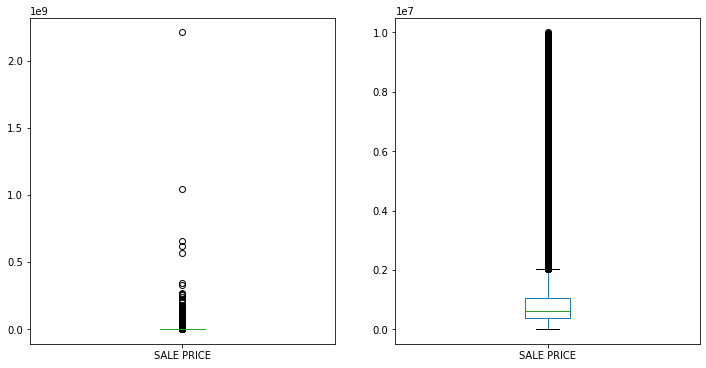

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
for df_temp, ax in zip((df["SALE PRICE"],df2["SALE PRICE"]),axes):  
    
    df_temp.plot(kind='box', 
            ax=ax,
           vert=True,
           )
     
plt.show()


## Descriptive Statictics for Borough Feature

**1. Count Value**

Use `.value_counts` function to count total value of `BOROUGH` features. Expected value:

4    26548\
3    23843\
1    18102\
5     8296\
2     6994\
Name: BOROUGH, dtype: int64

In [20]:
#Mapping the name of each Borough
df['BOROUGH']= df['BOROUGH'].replace({1:'Manhattan', 2:'Bronx', 3: 'Brooklyn', 4:'Queens',5:'Staten Island'})
df2['BOROUGH']= df2['BOROUGH'].replace({1:'Manhattan', 2:'Bronx', 3: 'Brooklyn', 4:'Queens',5:'Staten Island'})
df.value_counts(['BOROUGH'])

BOROUGH      
Queens           26548
Brooklyn         23843
Manhattan        18102
Staten Island     8296
Bronx             6994
dtype: int64

**2. Mean Value**

From here, we can calculate the mean for each Borough. Use `.mean()` function to calculate mean.

Function below are graded function. (1 Points)

In [21]:
mean_all_obs = df.groupby('BOROUGH').aggregate(mean_sale_price = ("SALE PRICE" , np.mean))
mean_low_high_dropped = df2.groupby('BOROUGH').aggregate(mean_sale_price = ("SALE PRICE" , np.mean)) 
    
display(mean_all_obs.head())
display(mean_low_high_dropped.head())

,mean_sale_price
BOROUGH,
Bronx,5.946771e+05
Brooklyn,8.410834e+05
Manhattan,3.344642e+06
Queens,7.388827e+05
Staten Island,5.436113e+05


,mean_sale_price
BOROUGH,
Bronx,5.933875e+05
Brooklyn,1.036350e+06
Manhattan,1.787087e+06
Queens,6.226056e+05
Staten Island,5.140001e+05


**3. Median**

From here, we can calculate the median for each Borough. Use `.median()` function to calculate median.

Function below are graded function. (1 Points)

In [22]:
median_all_obs = df.groupby('BOROUGH').aggregate(med_sale_price = ("SALE PRICE" , np.median))
median_low_high_dropped = df2.groupby('BOROUGH').aggregate(med_sale_price = ("SALE PRICE" , np.median))
    
display(median_all_obs.head())
display(median_low_high_dropped.head())

,med_sale_price
BOROUGH,
Bronx,274897.0
Brooklyn,425605.0
Manhattan,1155000.0
Queens,495000.0
Staten Island,465000.0


,med_sale_price
BOROUGH,
Bronx,406000.0
Brooklyn,770000.0
Manhattan,1100000.0
Queens,500000.0
Staten Island,470000.0


**4. Modus**

From here, we can calculate the mode for each Borough.

Function below are graded function. (1 Points)

In [23]:
mod_all_obs = df.groupby('BOROUGH').aggregate(mod_sale_price = ("SALE PRICE" , stats.mode))
mod_low_high_dropped = df2.groupby('BOROUGH').aggregate(mod_sale_price = ("SALE PRICE" , stats.mode))
    
display(mod_all_obs.head())
display(mod_low_high_dropped.head())

,mod_sale_price
BOROUGH,
Bronx,0.0
Brooklyn,0.0
Manhattan,10.0
Queens,10.0
Staten Island,10.0


,mod_sale_price
BOROUGH,
Bronx,500000.0
Brooklyn,650000.0
Manhattan,1100000.0
Queens,450000.0
Staten Island,450000.0


**5. Range**

From here, we can calculate the Range for each Borough.

Function below are graded function. (1 Points)

In [24]:
range_all_obs = df.groupby('BOROUGH').aggregate(range_sale_price = ("SALE PRICE" , np.ptp))
range_low_high_dropped = df2.groupby('BOROUGH').aggregate(range_sale_price= ("SALE PRICE", np.ptp)) 
    
display(range_all_obs.head())
display(range_low_high_dropped.head())

,range_sale_price
BOROUGH,
Bronx,110000000.0
Brooklyn,345000000.0
Manhattan,NaN
Queens,NaN
Staten Island,NaN


,range_sale_price
BOROUGH,
Bronx,9939500.0
Brooklyn,9926721.0
Manhattan,9989949.0
Queens,9889999.0
Staten Island,9489500.0


**6. Variance**

From here, we can calculate the Variance for each Borough.

Function below are graded function. (1 Points)

In [25]:
var_all_obs = df.groupby('BOROUGH').aggregate(var_sale_price = ("SALE PRICE" , np.var))
var_low_high_dropped = df2.groupby('BOROUGH').aggregate(var_sale_price= ("SALE PRICE", np.var)) 
    
display(var_all_obs.head())
display(var_low_high_dropped.head())

,var_sale_price
BOROUGH,
Bronx,7.803693e+12
Brooklyn,1.561761e+13
Manhattan,5.827628e+14
Queens,1.041624e+13
Staten Island,3.631100e+12


,var_sale_price
BOROUGH,
Bronx,9.171106e+11
Brooklyn,1.001995e+12
Manhattan,3.259199e+12
Queens,3.558953e+11
Staten Island,1.818607e+11


**7. Standard Deviation**

From here, we can calculate the SD for each Borough.

Function below are graded function. (1 Points)

In [26]:
std_all_obs = df.groupby('BOROUGH').aggregate(STD_Sale_price = ("SALE PRICE" , np.std))
std_low_high_dropped = df2.groupby('BOROUGH').aggregate(STD_Sale_price= ("SALE PRICE", np.std)) 
    
display(std_all_obs.head())
display(std_low_high_dropped.head())

,STD_Sale_price
BOROUGH,
Bronx,2.793509e+06
Brooklyn,3.951912e+06
Manhattan,2.414048e+07
Queens,3.227420e+06
Staten Island,1.905544e+06


,STD_Sale_price
BOROUGH,
Bronx,9.576589e+05
Brooklyn,1.000997e+06
Manhattan,1.805325e+06
Queens,5.965696e+05
Staten Island,4.264513e+05


**Insight**

As mentioned before, some variables are assigned with non-sense values. After drop those non-sense sale price values from the observation and compared to the original data, we find out that there are some vast differences reviewed with mean, modus, median, standard deviation, and range.  

## Probability Distribution

Now we can analyze Probability Distibution below.

Start from make plot distribution function, so we can use it whenever we want.

In [27]:
def plot_distribution(data,xlabel,title):
    plt.figure(figsize=(10,6))
    ax=sns.distplot(data, kde=True, bins=50, rug=True)
    ax.set(xlabel= xlabel, ylabel="Probability")
    plt.title(title)
    plt.show()
    

Let's see those vast difference between original data compared to dropped some non-sense value

1. SALE PRICE

C:\Users\tiurma.butarbutar\Anaconda3\envs\tmclbd\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\tiurma.butarbutar\Anaconda3\envs\tmclbd\lib\site-packages\seaborn\distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


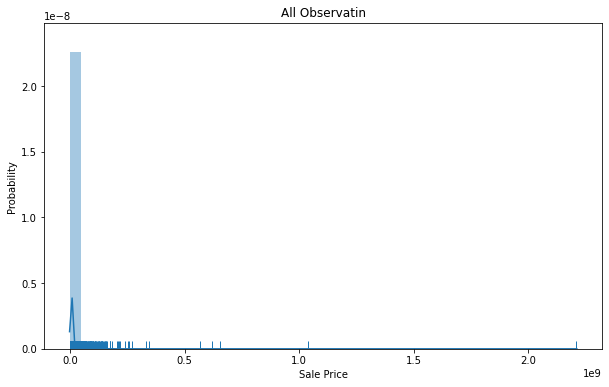

In [28]:
#Plot Distribution Sale price with all observation
plot_distribution(df['SALE PRICE'],"Sale Price","All Observatin")

C:\Users\tiurma.butarbutar\Anaconda3\envs\tmclbd\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\tiurma.butarbutar\Anaconda3\envs\tmclbd\lib\site-packages\seaborn\distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


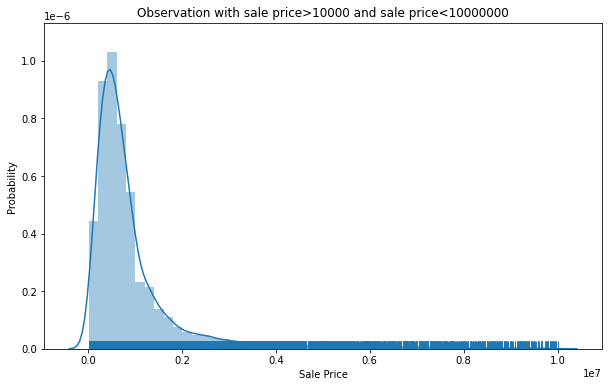

In [29]:
#Plot Distribution Sale price with with sale price>10000 and sale price<10000000
plot_distribution(df2['SALE PRICE'],"Sale Price","Observation with sale price>10000 and sale price<10000000")

2. YEAR BUILT

C:\Users\tiurma.butarbutar\Anaconda3\envs\tmclbd\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\tiurma.butarbutar\Anaconda3\envs\tmclbd\lib\site-packages\seaborn\distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


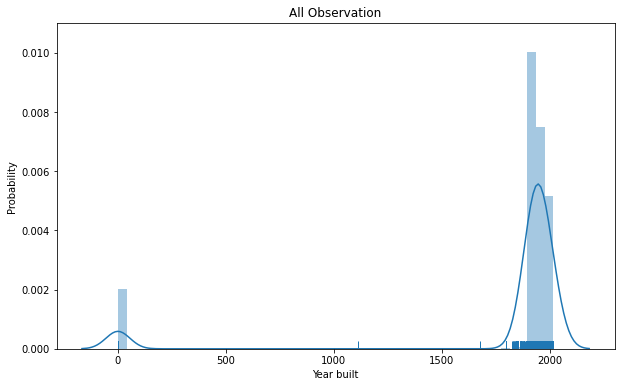

In [30]:
#Plot Distribution Year Built all observation
plot_distribution(df['YEAR BUILT'],"Year built","All Observation")

C:\Users\tiurma.butarbutar\Anaconda3\envs\tmclbd\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\tiurma.butarbutar\Anaconda3\envs\tmclbd\lib\site-packages\seaborn\distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


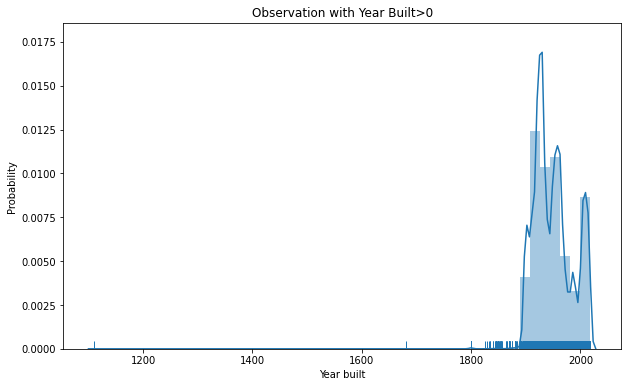

In [31]:
#Plot Distribution Year Built>0

df3=df[df['YEAR BUILT']!=0].copy()

plot_distribution(df3['YEAR BUILT'],"Year built","Observation with Year Built>0")

3. TOTAL UNITS

C:\Users\tiurma.butarbutar\Anaconda3\envs\tmclbd\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\tiurma.butarbutar\Anaconda3\envs\tmclbd\lib\site-packages\seaborn\distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


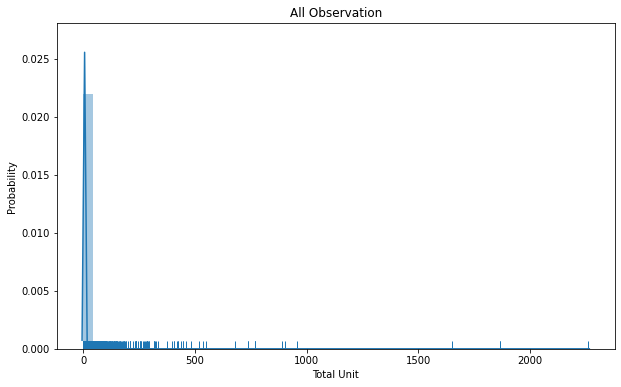

In [32]:
#Plot Distribution Total Unit all observation
plot_distribution(df['TOTAL UNITS'],"Total Unit","All Observation")

C:\Users\tiurma.butarbutar\Anaconda3\envs\tmclbd\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\tiurma.butarbutar\Anaconda3\envs\tmclbd\lib\site-packages\seaborn\distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


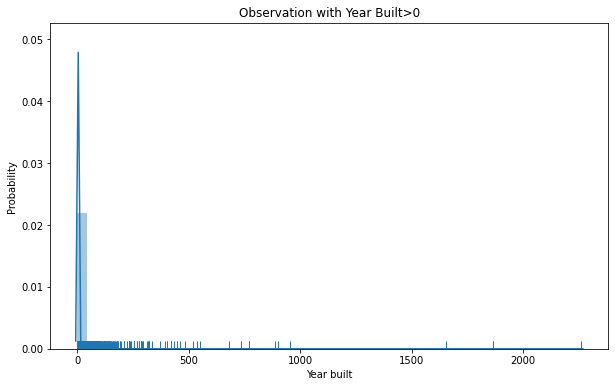

In [33]:
#Plot Distribution Total Unit>0

df4=df[df['TOTAL UNITS']!=0].copy()

plot_distribution(df4['TOTAL UNITS'],"Year built","Observation with Year Built>0")

## Confidence Interval

Now we can analyze Confidence Intervals below.

By calculate the Descriptive Statistics for each borough's sale price in original data compared to observation with dropped some non-sense value, we found out that the mean of broklyn before and after is quite different. Let's see using CI, what the lowest and highest sale price should be with confidence level 95%?

In [34]:
#1. Prepare the data
df[["BOROUGH", "SALE PRICE"]].groupby(["BOROUGH"]).aggregate({"SALE PRICE" : [np.mean, np.std,np.size]})

SALE PRICE                       
                       mean           std     size
BOROUGH                                           
Bronx          5.946771e+05  2.793509e+06   6994.0
Brooklyn       8.410834e+05  3.951912e+06  23843.0
Manhattan      3.344642e+06  2.414048e+07  18102.0
Queens         7.388827e+05  3.227420e+06  26548.0
Staten Island  5.436113e+05  1.905544e+06   8296.0

In [35]:
#2. Build function to calculate confidence Interval
def compute_CI(estimate, stderr, z_score=1.96):
    return(
    estimate - z_score*stderr,
    estimate + z_score*stderr
    )

In [36]:
#3. Calculate CI for Brooklyn
mean_broklyn = 8.410834e+05
std_broklyn = 3.951912e+06
n_broklyn = 23843.0
z = 1.96
stderr_broklyn = std_broklyn / np.sqrt(n_broklyn)


lower_ci, upper_ci =  compute_CI(mean_broklyn,stderr_broklyn)
print (f"Standard error : {stderr_broklyn}")
print(f"CI for broklyn = lower: {lower_ci : .3f}, upper :{upper_ci :.3f}")

Standard error : 25593.3311429182
CI for broklyn = lower:  790920.471, upper :891246.329


**Insight :**

That means the true mean of broklyn population sale price will fall between 790920.471 and 891246.329

## Hypothesis Testing

Make your Hypothesis Testing below

Is there a significant difference in average unit sold between property built in 1900-2000 and over 2001?

Population : Data total unit
Null Hypothesis : μ1=μ2
Alternative Hypothesis : μ1≠μ2

In [37]:
#1 Provide the data exclude Year Built =0 and Total Unit = 0
year_less_2000 = df3[(df3['YEAR BUILT']<=2000) & (df3['TOTAL UNITS']!=0) ].copy()
year_over_2000 = df3[(df3['YEAR BUILT']>2000) & (df3['TOTAL UNITS']!=0) ].copy()

#2 Calculate num of obs, mean, and std data 1
#num of obs
num_less_2000 = len(year_less_2000)
num_over_2000 = len(year_less_2000)

#mean
mu_less_2000 = year_less_2000['TOTAL UNITS'].mean()
mu_over_2000 = year_over_2000['TOTAL UNITS'].mean()

#std
std_less_2000=year_less_2000['TOTAL UNITS'].std()
std_over_2000=year_over_2000['TOTAL UNITS'].std()

In [38]:
sm.stats.ztest(year_less_2000['TOTAL UNITS'].dropna(),year_over_2000['TOTAL UNITS'].dropna(), alternative = "two-sided")

(4.448948894027615, 8.629154368422079e-06)

**INSIGHT**

Because p-value is very low, we can say that the average unit sold between property built in 1900-2000 is as same as built over 2000.